## Lab -- March 29th 30th

This lab is based off the *Dynamic.plots.1/2/3.ipynb* notebooks.

Part (1). Create an animated plot of the double pendulum with a *trace* like in the last plot from Dynamic.plots.1.ipynb.

Part (2). Create a text field in your animated plot that gives a readout of the total energy of the system, i.e. the sum of the kinetic plus potential energies.

Part (3). Experiment with frictionless double pendulums.  In such a system, the total energy should be constant.  Is it constant in your simulation?  If not, experiment with ways of reducing the change in energy.  Some suggestions:

 (a) Try reducing your step size.

 (b) Try using a different numerical ODE integrator.
 
 (c) Perhaps consider adapting your ODE integrator technique to ensure the energy remains constant?
 
 (d) Can you think of anything else to try?
 

In [1]:
import sympy as sp
from sympy.utilities.autowrap import ufuncify
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from scipy.integrate import odeint

%matplotlib nbagg

m1, m2, k1, k2, r1, r2, g, t = sp.symbols("m_1 m_2 k_1 k_2 r_1 r_2 g t")
w1, w2, t1, t2 = sp.symbols("w_1 w_2 t_1 t_2")

In [2]:
xT1pp = (r1*(g*m2*r2*sp.sin(t2) - k2*w1 + k2*w2 - m2*r1*r2*w1**2*sp.sin(t1 - t2))*sp.cos(t1 - t2) - r2*(g*m1*r1*sp.sin(t1) + g*m2*r1*sp.sin(t1) + k1*w1 + k2*w1 - k2*w2 + m2*r1*r2*w2**2*sp.sin(t1 - t2)))/(r1**2*r2*(m1 - m2*sp.cos(t1 - t2)**2 + m2))
xT2pp = (m2*r2*(g*m1*r1*sp.sin(t1) + g*m2*r1*sp.sin(t1) + k1*w1 + k2*w1 - k2*w2 + m2*r1*r2*w2**2*sp.sin(t1 - t2))*sp.cos(t1 - t2) - r1*(m1 + m2)*(g*m2*r2*sp.sin(t2) - k2*w1 + k2*w2 - m2*r1*r2*w1**2*sp.sin(t1 - t2)))/(m2*r1*r2**2*(m1 - m2*sp.cos(t1 - t2)**2 + m2))

In [3]:
from sympy.utilities.autowrap import ufuncify
t1pp = ufuncify([r1,r2,m1,m2,k1,k2,t1,t2,w1,w2,g], xT1pp)
t2pp = ufuncify([r1,r2,m1,m2,k1,k2,t1,t2,w1,w2,g], xT2pp)

## TH = (theta1, theta2, theta1', theta2')

def theODE(TH, t, r1, r2, m1, m2, k1, k2, g):
    return [TH[2], TH[3], \
            t1pp(r1, r2, m1, m2, k1, k2, TH[0], TH[1], TH[2], TH[3], g), \
            t2pp(r1, r2, m1, m2, k1, k2, TH[0], TH[1], TH[2], TH[3], g)]

In [4]:

X = theODE([1.0, 1.0, 0.0, 0.0], 0.0, 1.0, 1.0, 1.0, 1.0, 0.1, 0.1, 10.0)
print(X)


[0.0, 0.0, -8.4147098480789655, 0.0]


In [5]:
plt.close()

<IPython.core.display.Javascript object>


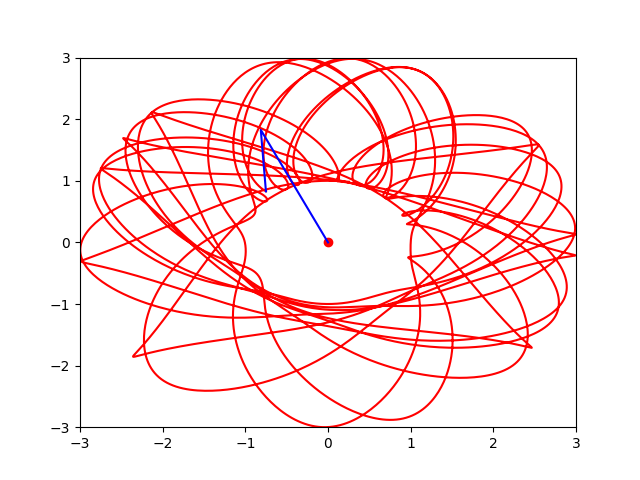

In [7]:
## make a dynamic plot -- an animated plot that looks like a double pendulum in motion
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from scipy.integrate import odeint

%matplotlib nbagg  
##matplotlib notebook

## our grab of the single pendulum animation from Dynamic.plots.1
## let's modify it. 
fig, ax = plt.subplots()
## arm lengths
R1 = 2.0
R2 = 1.0

cent = plt.plot([0.0], [0.0], 'ro')
ax.set_xlim(-(R1+R2), R1+R2)
ax.set_ylim(-(R1+R2), R1+R2)

tr, = plt.plot([0], [0], 'r-')

## set up arm initial state
## [theta1, theta2, theta1', theta2']
TS = [3.0, 0.0, 7.0, 0.0]
TSA = [TS] ## array of states

def armvecx(TS):
    return [0.0, R1*np.sin(TS[0]), R1*np.sin(TS[0])+R2*np.sin(TS[1])]
def armvecy(TS):
    return [0.0, -R1*np.cos(TS[0]), -R1*np.cos(TS[0])-R2*np.cos(TS[1])]

arm, = plt.plot(armvecx(TS), armvecy(TS), 'b')

dt = 0.002

def init():
    arm.set_xdata( armvecx(TSA[-1]) )
    arm.set_ydata( armvecy(TSA[-1]) )
    return arm, tr

# recdat = []
tr_xs = []
tr_ys = []

def animate(i):
    ## asking the ODE code to do just one step
    #def theODE(TH, t, r1, r2, m1, m2, k1, k2, g):
    
    SOL = odeint(theODE, TSA[-1], [0.0, dt], args=(R1, R2, 1.0, 1.0, 0.01, 0.01, 10.0))
    
    TSA.append(SOL[-1])
    arm.set_xdata( armvecx(TSA[-1]) )
    arm.set_ydata( armvecy(TSA[-1]) )
    
    
    tr_xs.append(R1*np.sin(TSA[-1][0])+R2*np.sin(TSA[-1][1]))
    tr_ys.append(-R1*np.cos(TSA[-1][0])-R2*np.cos(TSA[-1][1]))
    tr.set_xdata(tr_xs)
    tr.set_ydata(tr_ys)
    
    return arm, tr

animate(0)

## interval is ms delay between frames
ani = animation.FuncAnimation( fig, animate, init_func=init, interval=1,\
                               blit=True )



plt.show()